# Hola chicos, este es el decorador que vamos a usar TODOS para calcular el runtime, porfis utilizen este

In [46]:
import time
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time.time()*10**12
        result = func(*args, **kwargs)
        t2 = time.time()*10**12
        return result , t2-t1
    return wrap_func

# EL ARCHIVO FINAL_PROGRAM.PY ES UN PRIMER AVANCE DEL PROGRAMA, AUN NO ESTA TERMINADO, PUEDEN PROBAR EL CODIGO
# HUGE TEXT EXAMPLE ES EL ARCHIVO DE TEXTO QUE VAMOS A USAR PARA BUSCAR LAS PALABRAS, AQUI ABAJO TIENEN UN ARRAY CON LAS PALABRAS QUE VAMOS A BUSCAR Y EL COMO CARGAR EL TEXTO EN SUS NOTEBOOKS

In [47]:
with open('huge_txt_example.txt', 'r') as file:
    data = file.read()

#data to lowercase
data = data.lower()

#la variable data les retorna un string enorme, es todo el txt cargado

#porfas vean el codigo de mi carpeta Juan francisco o el de la paulita
# ahi tienen dos ejemplos buenos para que solo implementen sus algoritmos

In [48]:
wordSearchList = ['dui','aliquam','habitant','neque','nunc','commodo','libero','nulla','sapien','suscipit','viverra','mauris','nibh','nisi','nisl','nunc','odio','orci','ornare','pellentesque','pharetra','placerat','porta','porttitor','posuere','potenti','praesent','pretium','proin','pulvinar','purus','quam','quis','quisque','rhoncus','risus','rutrum','sagittis','sapien','scelerisque','sed','sem','semper','senectus','sit','sociis','sociosqu','sodales','sollicitudin','suscipit','suspendisse','taciti','tellus','tempor','tempus','tincidunt','torquent','tortor','tristique','turpis','ullamcorper','ultrices','ultricies','urna','ut','varius','vehicula','vel','velit','venenatis','vestibulum','vitae','vivamus','viverra','volutpat','vulputate']

# ESTAS PALABRAS DEBEN USARLAS PARA CALCULAR SUS RUNTIMES

# FINALMENTE RECUERDEN SIEMPRE HACER UN PULL ANTES DE REALIZAR SUS AVANCES PARA ESTAR COORDINADOS UNOS CON OTROS

# LEYENDO EL TXT CON EL TEXTO

In [49]:
with open('huge_txt_example.txt', 'r') as file:
    data = file.read()

#data to lowercase
data = data.lower()
document = data.split(" ")

# COMPARACION LINEAR SEARCH V.S BOYER-MOORE

In [50]:
NO_OF_CHARS = 256

def badCharHeuristic(string, size):
	badChar = [-1]*NO_OF_CHARS

	for i in range(size):
		badChar[ord(string[i])] = i;

	return badChar

@timer_func
def boyer_moore_search(txt, pat):

	patternFound = []

	m = len(pat)
	n = len(txt)

	badChar = badCharHeuristic(pat, m)

	s = 0
	while(s <= n-m):
		j = m-1

		while j>=0 and pat[j] == txt[s+j]:
			j -= 1

		if j<0:
			#print("Pattern occur at shift = {}".format(s))
			patternFound.append(s)
			s += (m-badChar[ord(txt[s+m])] if s+m<n else 1)
		else:
			s += max(1, j-badChar[ord(txt[s+j])])


	return patternFound

In [51]:
@timer_func
def Linear_search(arr, x):
    foundedWords = []
    for i in range(len(arr)):
        if arr[i] == x:
            foundedWords.append(i)
    if len(foundedWords) == 0:
        return "Not Found"
    return foundedWords

In [52]:

runtimeBOYER = []
for i in wordSearchList:
	#print('Searching for: ',i)
	search = boyer_moore_search(data,i)
	runtimeBOYER.append(search[1])

In [53]:
runtime = []
for i in wordSearchList:
	search = Linear_search(document,i)
	runtime.append(search[1])

<AxesSubplot: >

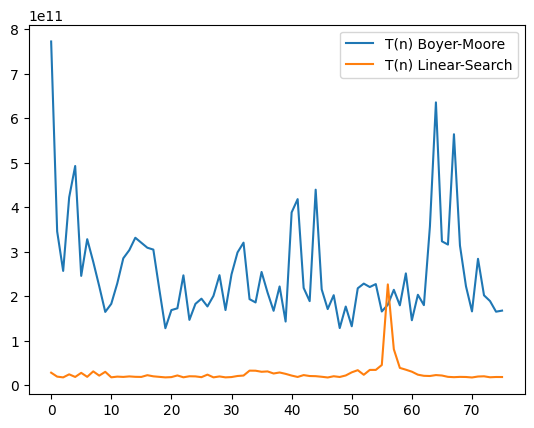

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(zip(runtimeBOYER,runtime))  #DEFINE THE DATA FRAME
df.columns = ['T(n) Boyer-Moore', 'T(n) Linear-Search']
df
df.plot()